In [1]:
# ライブラリのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame, Series


In [2]:
# データの読み込み
try:
    df = pd.read_csv('データセット\I社\data.csv')
except FileNotFoundError:
    print("データファイルが見つかりません。パスを確認してください。")
    exit()

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\taich\AppData\Local\Temp\ipykernel_14408\2843283510.py:3: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('データセット\I社\data.csv')


In [3]:
# 日本語フォントの設定
import matplotlib.font_manager as fm
import warnings

# 警告を非表示にする（オプション）
warnings.filterwarnings('ignore')

# Windowsで利用可能な日本語フォントを確実に設定
def setup_japanese_font():
    # Windows環境での日本語フォント設定（優先順位付き）
    japanese_fonts = ['MS Gothic', 'Yu Gothic', 'Meiryo', 'MS Mincho']
    
    font_found = False
    for font in japanese_fonts:
        try:
            # フォントが存在するかテスト
            test_fig = plt.figure(figsize=(1, 1))
            plt.rcParams['font.family'] = font
            plt.text(0.5, 0.5, 'テスト', fontsize=8)
            plt.close(test_fig)
            print(f"使用フォント: {font}")
            font_found = True
            break
        except Exception as e:
            continue
    
    if not font_found:
        print("日本語フォントが見つかりません。デフォルトフォントを使用します。")
        # デフォルトに戻す
        plt.rcParams['font.family'] = 'sans-serif'
    
    # その他の設定
    plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策
    plt.rcParams['figure.figsize'] = (10, 6)    # デフォルト図のサイズ

# フォント設定を実行
setup_japanese_font()

使用フォント: MS Gothic


In [4]:
# スタイルの設定
sns.set(style="whitegrid")
sns.set_context("talk") # フォントサイズを大きくする
palette_colors = {'Yes': 'tomato', 'No': 'skyblue'}


In [5]:
# 最大表示行数の指定
pd.set_option('display.max_columns', 100)

In [6]:
# データの確認
print(f"df shape: {df.shape}")
df.head()

df shape: (1470, 44)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,PerformanceIndex,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,16,1,1,40,0,8,0,1,6,4,0,5,agent_B,0,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,7,4,4,40,1,10,3,3,10,7,1,7,intern,3431,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,32,3,2,40,0,7,3,3,0,0,0,0,intern,0,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,28,1,3,40,0,8,3,3,8,7,3,0,intern,0,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,10,2,4,40,1,6,3,3,2,2,2,2,agent_C,0,2,3029,3,2,0,0,0,0,3,2023


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [8]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,MonthlyAchievement,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.895238,9.236735,2.910204,1.0,1022.185034,2.721769,65.891156,2.729932,2.074830,2.728571,14313.103401,2.682993,15.330612,2.533333,2.712245,40.0,0.793878,11.253741,2.799320,2.761224,7.008163,4.231293,2.196599,4.123810,1142.874150,2.824490,6922.257143,2.499320,2.500000,0.596599,0.293878,0.252381,0.551020,2.104082,2023.200000
std,9.151321,8.129551,1.025259,0.0,602.769132,1.093082,20.329428,0.711561,1.109943,1.102846,7117.786044,2.498505,12.518178,0.991409,1.081209,0.0,0.852077,7.754327,1.289271,0.706476,6.110504,3.590639,3.214817,3.569734,1506.257621,1.229521,1977.100821,0.883052,1.131124,0.490747,0.455692,0.434526,0.497559,0.949750,0.400136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,0.000000,1.000000,1.000000,40.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1329.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
25%,30.000000,2.000000,2.000000,1.0,486.250000,2.000000,48.000000,2.000000,1.000000,2.000000,8047.000000,1.000000,5.000000,2.000000,2.000000,40.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,5542.250000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
50%,36.000000,7.000000,3.000000,1.0,1018.500000,3.000000,66.000000,3.000000,2.000000,3.000000,14235.500000,2.000000,13.000000,3.000000,3.000000,40.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000,6814.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2023.000000
75%,43.000000,14.000000,4.000000,1.0,1554.750000,4.000000,83.750000,3.000000,3.000000,4.000000,20461.500000,4.000000,24.000000,3.000000,4.000000,40.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2394.250000,4.000000,8264.750000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2023.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,61.000000,4.000000,4.000000,40.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,6047.000000,5.000000,12612.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2024.000000


In [9]:
# カラムの確認
df.select_dtypes(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,HowToEmploy
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,agent_B
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,intern
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,intern
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,intern
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,agent_C
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,intern
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,intern
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,intern
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,intern


In [10]:
df.select_dtypes(exclude=object)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,MonthlyAchievement,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,1,2,1,1,2,94,3,2,4,19479,8,16,1,1,40,0,8,0,1,6,4,0,5,0,1,5224,4,1,0,0,0,0,1,2023
1,49,8,1,1,2,3,61,2,2,2,24907,1,7,4,4,40,1,10,3,3,10,7,1,7,3431,3,6863,2,4,1,0,0,1,1,2023
2,37,2,2,1,4,4,92,2,1,3,2396,6,32,3,2,40,0,7,3,3,0,0,0,0,0,2,7612,3,2,1,0,0,0,1,2023
3,33,3,4,1,5,4,56,3,1,3,23159,1,28,1,3,40,0,8,3,3,8,7,3,0,0,2,11245,1,4,1,1,1,1,1,2023
4,27,2,1,1,7,1,40,3,1,2,16632,9,10,2,4,40,1,6,3,3,2,2,2,2,0,2,3029,3,2,0,0,0,0,3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,1,2061,3,41,4,2,4,12290,4,27,3,3,40,1,17,3,3,5,2,0,3,0,5,5329,4,1,0,0,0,0,1,2023
1466,39,6,1,1,2062,4,42,2,3,1,21457,4,37,3,1,40,1,9,5,3,7,7,1,7,2458,1,5175,2,4,1,0,1,1,2,2024
1467,27,4,3,1,2064,2,87,4,2,2,5174,1,14,4,2,40,1,6,0,3,6,2,0,3,0,3,5828,3,1,0,0,0,0,3,2023
1468,49,2,3,1,2065,4,63,2,2,2,13243,2,2,3,4,40,0,17,3,2,9,6,0,8,0,2,9420,3,3,1,0,1,0,3,2023


In [11]:
# 部門別の離職者数と離職率を計算
department_attrition = df.groupby('Department')['Attrition'].value_counts().unstack().fillna(0)
department_attrition_rate = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# 離職者数（Yes）の多い順に並べ替え
department_sorted_by_count = department_attrition.sort_values('Yes', ascending=False)
department_sorted_by_rate = department_attrition_rate.sort_values('Yes', ascending=False)

print("--- 部門別離職者数（離職者数の多い順） ---")
print(department_sorted_by_count)
print("\n--- 部門別離職率（離職率の高い順） ---")
print(department_sorted_by_rate['Yes'] * 100)

--- 部門別離職者数（離職者数の多い順） ---
Attrition                No  Yes
Department                      
Research & Development  825  136
Sales                   356   90
Human Resources          51   12

--- 部門別離職率（離職率の高い順） ---
Department
Sales                     20.179372
Human Resources           19.047619
Research & Development    14.151925
Name: Yes, dtype: float64


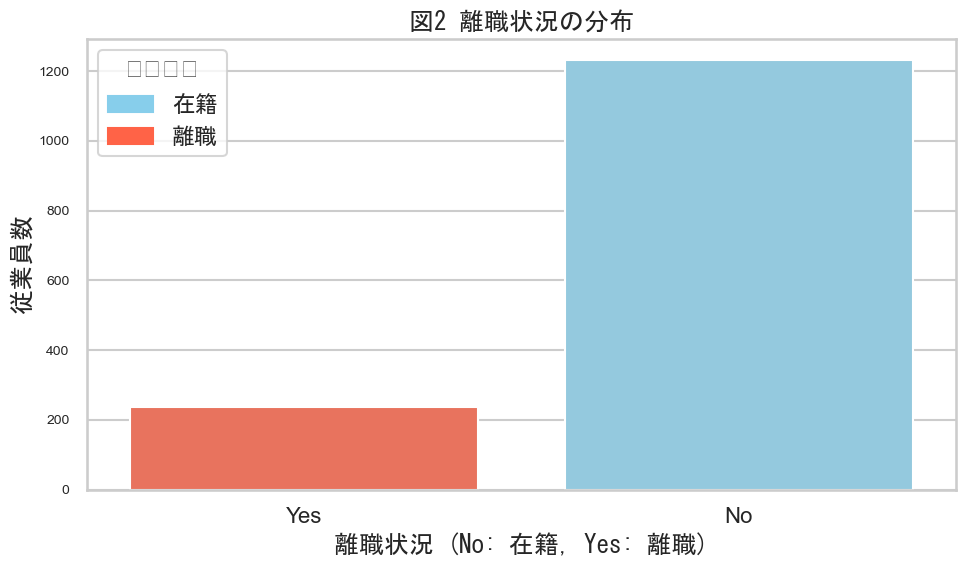

In [27]:
# 目的変数（Attrition）の分布
# Seabornの警告を回避するため、hueを明示的に指定
ax = sns.countplot(x='Attrition', data=df, hue='Attrition', palette=palette_colors, legend=False)
plt.title('図2 離職状況の分布', fontfamily='MS Gothic')
plt.xlabel('離職状況 (No: 在籍, Yes: 離職)', fontfamily='MS Gothic')
plt.ylabel('従業員数', fontfamily='MS Gothic')

# 正しい順序で凡例を設定
import matplotlib.patches as mpatches
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})

plt.tight_layout()
plt.show()

In [13]:
# 'Attrition'列の各値の割合を計算
attrition_ratio = df['Attrition'].value_counts(normalize=True)

# 'No'の割合を取得
no_ratio = attrition_ratio['Yes']

# パーセンテージに変換して表示
no_percentage = no_ratio * 100

print(f"離職者の割合: {no_percentage:.2f}%")

離職者の割合: 16.19%


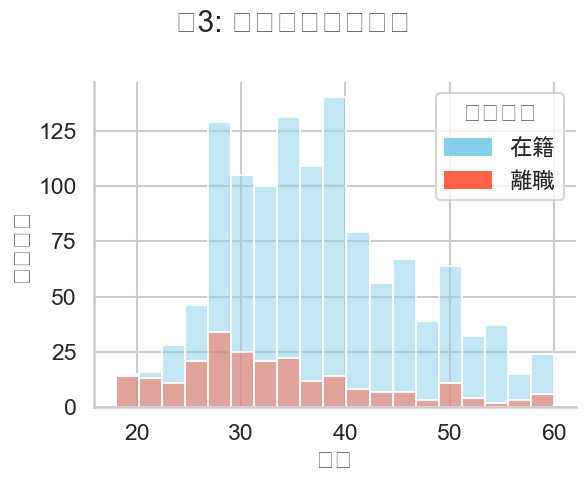

In [14]:
# 図１ 年齢（Age）と離職状況（Attrition）の関係を可視化
g =sns.displot(data=df, x='Age', hue='Attrition', fill=True, palette=palette_colors)
g.fig.suptitle('図3: 年齢別の離職状況')
g.set_xlabels('年齢')   
g.set_ylabels('従業員数')
g._legend.remove()  
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})
plt.tight_layout()
plt.show()

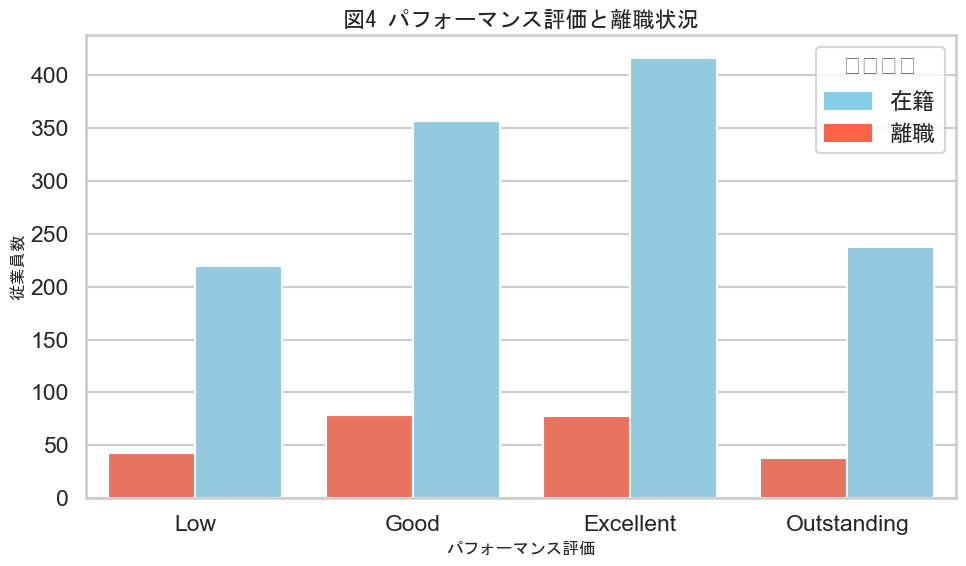

In [15]:
# 数値を文字列に変換
df['PerformanceRating_str'] = df['PerformanceRating'].map({
    1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'
})

sns.countplot(data=df, x='PerformanceRating_str', hue='Attrition', 
              order=['Low', 'Good', 'Excellent', 'Outstanding'], 
              palette=palette_colors, legend=False)
plt.title('図4 パフォーマンス評価と離職状況', fontsize=16, fontfamily='MS Gothic')
plt.xlabel('パフォーマンス評価', fontsize=12, fontfamily='MS Gothic')
plt.ylabel('従業員数', fontsize=12, fontfamily='MS Gothic')
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})
plt.tight_layout()
plt.show()

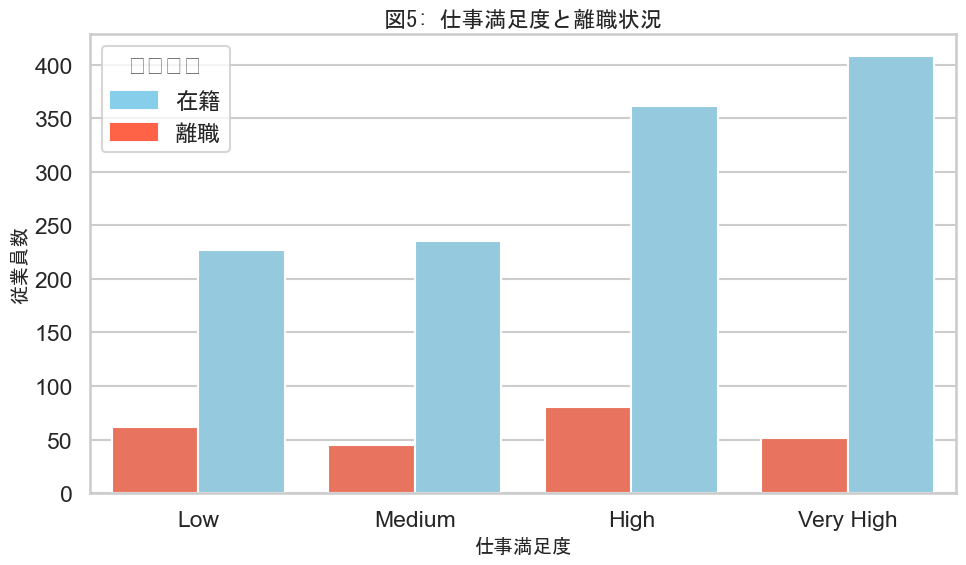

In [16]:
# 数値を文字列に変換
df['JobSatisfaction_str'] = df['JobSatisfaction'].map({
    1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
})

sns.countplot(data=df, x='JobSatisfaction_str', hue='Attrition', 
              order=['Low', 'Medium', 'High', 'Very High'], 
              palette=palette_colors, legend=False)
plt.title('図5: 仕事満足度と離職状況', fontsize=16, fontfamily='MS Gothic')
plt.xlabel('仕事満足度', fontsize=14, fontfamily='MS Gothic')
plt.ylabel('従業員数', fontsize=14, fontfamily='MS Gothic')
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})
plt.tight_layout()
plt.show()

In [17]:
satisfaction_attrition_ratio = df.groupby('JobSatisfaction_str')['Attrition'].value_counts(normalize=True)
yes_ratio = satisfaction_attrition_ratio.unstack().fillna(0)['Yes'] * 100
order = ['Low', 'Medium', 'High', 'Very High']
print("仕事満足度ごとの離職率:")
print(yes_ratio.reindex(order).round(2))

仕事満足度ごとの離職率:
JobSatisfaction_str
Low          21.45
Medium       16.07
High         18.10
Very High    11.11
Name: Yes, dtype: float64


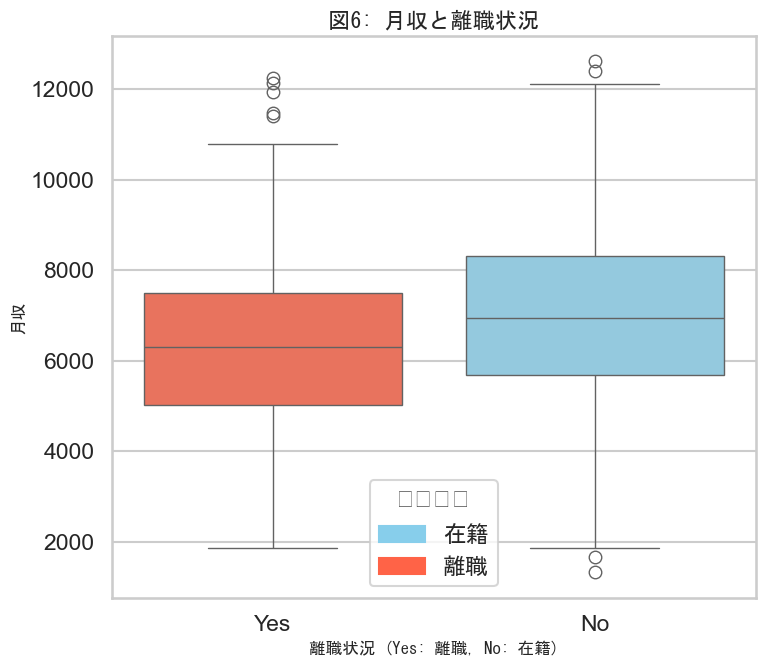

In [18]:
# --- 図4: 月収と離職状況 (箱ひげ図) ---
plt.figure(figsize=(8, 7))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=palette_colors, legend=False)
plt.title('図6: 月収と離職状況', fontsize=16, fontfamily='MS Gothic')
plt.xlabel('離職状況 (Yes: 離職, No: 在籍)', fontsize=12, fontfamily='MS Gothic')
plt.ylabel('月収', fontsize=12, fontfamily='MS Gothic')
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})
plt.tight_layout()
plt.show()

**着眼点**
* 低月収層の離職率が高いか
* 高月収層でも離職が発生しているか
* 月収の分布に離職者と非離職者で違いがあるか


* 白い丸は**外れ値**

    左側（'No' / 非離職者）の箱: 白い丸（外れ値）がたくさん上部にあります。これは、在籍し続けている従業員の中には、大多数の同僚よりも著しく高い月収を得ている層（役員やシニアな専門職など）が存在することを示しています。

    右側（'Yes' / 離職者）の箱: 外れ値がほとんどありません。これは、離職した従業員の月収は、ある一定の範囲内に収まっており、極端に高い給与をもらっている人はいなかったことを意味します。

結論として、この外れ値の存在は「月収が非常に高い従業員は離職しにくい」という傾向を強く裏付けています。



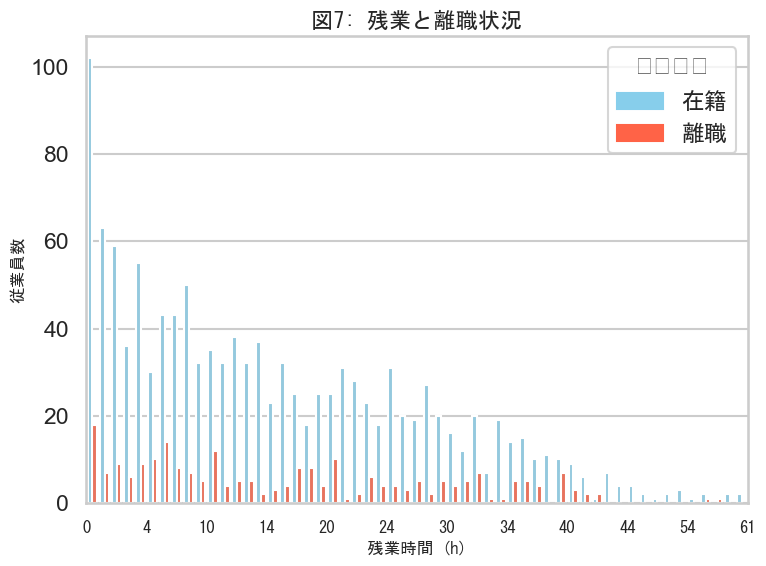

In [19]:
# --- 図5: 残業と離職状況 (カウントプロット) ---
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette=palette_colors, legend=False)
plt.title('図7: 残業と離職状況', fontsize=16, fontfamily='MS Gothic')
min_x, max_x = plt.xlim()
x_ticks = np.arange(min_x, max_x + 5, 5)
plt.xticks(x_ticks, fontsize=12, fontfamily='MS Gothic')
plt.xlabel('残業時間 (h)', fontsize=12, fontfamily='MS Gothic')
plt.ylabel('従業員数', fontsize=12, fontfamily='MS Gothic')
yes_patch = mpatches.Patch(color='tomato', label='離職')
no_patch = mpatches.Patch(color='skyblue', label='在籍')
plt.legend(handles=[no_patch, yes_patch], title='離職状況', prop={'family': 'MS Gothic'})
plt.tight_layout()
plt.show()


In [20]:
overtime_attriton_ratio = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
yes_ratio = overtime_attriton_ratio.fillna(0)['Yes'] * 100
sorted_yes_ratio_by_value = yes_ratio.sort_values(ascending=True)
print("残業の有無ごとの離職率:")
print(sorted_yes_ratio_by_value.round(2))

残業の有無ごとの離職率:
OverTime
61      0.00
46      0.00
48      0.00
45      0.00
38      0.00
49      0.00
43      0.00
54      0.00
60      0.00
51      0.00
44      0.00
21      3.12
34      5.00
14      5.13
22      6.67
28      6.90
1      10.00
11     11.11
16     11.11
25     11.43
15     11.54
12     11.63
8      12.28
33     12.50
26     13.04
2      13.24
13     13.51
9      13.51
19     13.79
4      14.06
3      14.29
0      15.00
7      15.69
24     18.18
30     20.00
29     20.00
23     20.69
27     20.83
17     24.24
6      24.56
5      25.00
36     25.00
40     25.00
41     25.00
10     25.53
32     25.93
35     26.32
20     28.57
37     28.57
31     29.41
18     30.77
55     33.33
39     41.18
42     66.67
58    100.00
Name: Yes, dtype: float64


In [21]:
# --- 1. 残業時間を10時間ごとのグループに分ける ---
# 0から始まり、データの最大値を超えるまで10刻みの区切りを作成 (例: [0, 10, 20, ...])
bins = np.arange(0, df['OverTime'].max() + 5, 5)
# 各グループの名前を作成 
labels = [f"{int(i)}-{int(i+4)}h" for i in bins[:-1]]

# 'OverTime_group'という新しい列に、分類されたグループ名を入れる
df['OverTime_group'] = pd.cut(df['OverTime'], bins=bins, labels=labels, right=False, include_lowest=True)


# --- 2. 新しく作成したグループで離職率を計算する ---
# 'OverTime_group'でグループ化して集計
overtime_group_ratio = df.groupby('OverTime_group')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
overtime_group = df.groupby('OverTime_group')['Attrition'].value_counts().unstack().fillna(0)
sorted_overtime_group = overtime_group.sort_values(by='Yes',ascending=False)
# 'Yes'の割合を抽出してパーセンテージに変換
yes_ratio_grouped = overtime_group_ratio['Yes'] * 100
sorted_yes_ratio_grouped = yes_ratio_grouped.sort_values(ascending=False)


# --- 3. 結果を表示する ---
print("--- 残業時間グループ別の離職者数 ---")
print(sorted_overtime_group)
print("\n --- 残業時間グループ別の離職率（パーセンテージ） ---")
print(sorted_yes_ratio_grouped.round(2))

--- 残業時間グループ別の離職者数 ---
Attrition        No  Yes
OverTime_group          
0-4h            315   49
5-9h            198   44
10-14h          174   28
15-19h          123   27
20-24h          125   23
35-39h           60   21
25-29h          117   19
30-34h           74   18
40-44h           27    7
55-59h            2    2
45-49h            9    0
50-54h            4    0
60-64h            4    0

 --- 残業時間グループ別の離職率（パーセンテージ） ---
OverTime_group
55-59h    50.00
35-39h    25.93
40-44h    20.59
30-34h    19.57
5-9h      18.18
15-19h    18.00
20-24h    15.54
25-29h    13.97
10-14h    13.86
0-4h      13.46
45-49h     0.00
50-54h     0.00
60-64h     0.00
Name: Yes, dtype: float64


<Axes: >

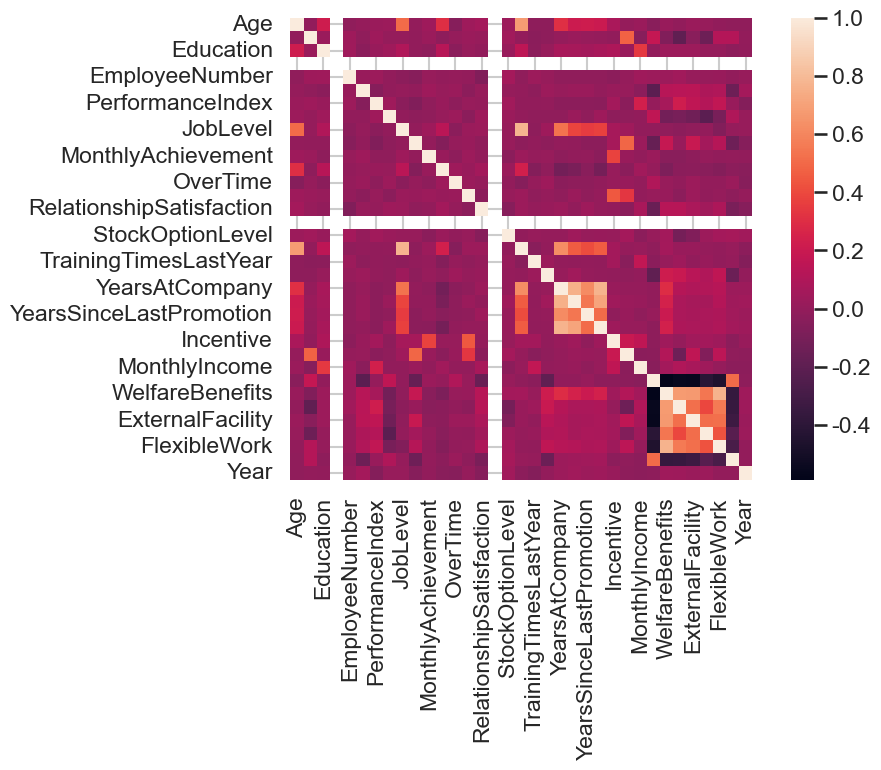

In [22]:
# 数値型の列のみを選択して相関係数を計算
corr = df.select_dtypes(include='number').corr()

# ヒートマップを描画
sns.heatmap(corr, square=True, annot=False)

--- 5つの新しい特徴量を作成します ---
5つの特徴量作成が完了しました。
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
--- LightGBM Model Evaluation Results ---
Accuracy (正解率): 0.8639
Recall (再現率): 0.4375
Precision (適合率): 0.6176
F1 Score: 0.5122


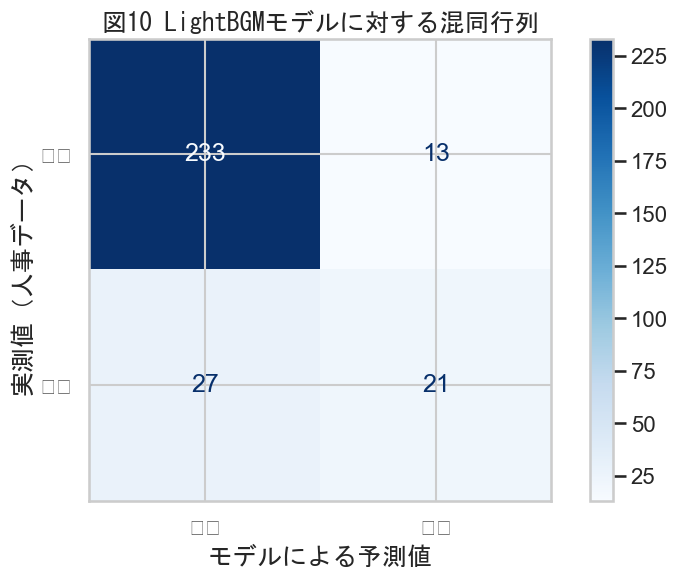

In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1. データ準備: テキストデータを数値に変換

# 目的変数（y）を0と1に変換
y = df['Attrition'].map({'Yes': 1, 'No': 0})

# 特徴量（X）から不要な列を削除
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# 2. 特徴量エンジニアリング (5つの新しい特徴量を作成)
# ----------------------------------------------------------------
print("--- 5つの新しい特徴量を作成します ---")

# 特徴量1: OverallSatisfaction (総合満足度)
X['OverallSatisfaction'] = (X['EnvironmentSatisfaction'] + X['JobSatisfaction'] + X['RelationshipSatisfaction'] + X['WorkLifeBalance']) / 4

# 特徴量2: IncomePerJobLevel (職務レベル当たりの月収)
# JobLevelの最小値は1のため、ゼロ除算の心配はありません
X['IncomePerJobLevel'] = X['MonthlyIncome'] / X['JobLevel']

# 特徴量3: YearsPerCompanyRatio (キャリア内での現職年数比率)
# TotalWorkingYearsが0の場合のゼロ除算を避けるため、分母に1を加えます
X['YearsPerCompanyRatio'] = X['YearsAtCompany'] / (X['TotalWorkingYears'] + 1)

# 特徴量4: IncomeToAchievementRatio (達成度に対する収入の比率)
# MonthlyAchievementが0の場合のゼロ除算を避けるため、分母に1を加えます
X['IncomeToAchievementRatio'] = X['MonthlyIncome'] / (X['MonthlyAchievement'] + 1)

# 特徴量5: OvertimeAndLowIncome (残業あり×低収入フラグ)
# 月収が下位25%以下の従業員を「低収入」と定義します
low_income_threshold = df['MonthlyIncome'].quantile(0.25)
# 'OverTime'が13.8時間（日本の平均残業時間）以上かつ月収が閾値以下の場合に1となるフラグを作成します
X['OvertimeAndLowIncome'] = ((X['OverTime'] >= 13.8) & (X['MonthlyIncome'] <= low_income_threshold)).astype(int)

print("5つの特徴量作成が完了しました。")

# カテゴリ変数をダミー変数（数値）に一括変換(One-Hot Encoding)
X_processed = pd.get_dummies(X, drop_first=True)

# 3. データ分割: 学習用とテスト用に80:20で分割
# ----------------------------------------------------------------
# stratify=y で、元の離職率の比率を保ったまま分割
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# 4. モデル学習: LightGBMでパターンを学習
# ----------------------------------------------------------------
# LightGBM 分類器を初期化
model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
# 学習用データでモデルを学習
model.fit(X_train, y_train)

# 5. 予測と評価: テストデータで性能を評価
# ----------------------------------------------------------------
# テストデータを使って離職予測
y_pred = model.predict(X_test)

# 各種評価指標を計算
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- LightGBM Model Evaluation Results ---")
print(f"Accuracy (正解率): {accuracy:.4f}")
print(f"Recall (再現率): {recall:.4f}")
print(f"Precision (適合率): {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# 混同行列を計算して可視化
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['在籍', '離職'])
disp.plot(cmap='Blues')
plt.xlabel('モデルによる予測値', fontfamily='MS Gothic')
plt.ylabel('実測値（人事データ）', fontfamily='MS Gothic')
plt.title('図10 LightBGMモデルに対する混同行列', fontfamily='MS Gothic')
plt.show()



--- ROC Curve and AUC ---
AUC (Area Under the Curve): 0.8278


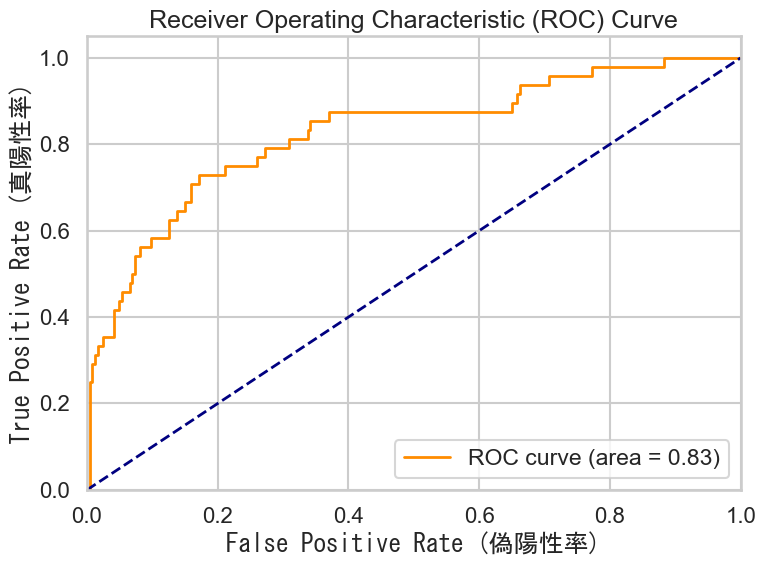

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
# --- ROC曲線とAUCの計算・可視化 ---

# テストデータに対する予測確率を取得 (陽性クラス '1' の確率)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUCスコアを計算
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n--- ROC Curve and AUC ---")
print(f"AUC (Area Under the Curve): {auc:.4f}")

# ROC曲線を計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC曲線をプロット
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # ランダム推測の線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (偽陽性率)', fontdict={'family': 'MS Gothic'})
plt.ylabel('True Positive Rate (真陽性率)', fontdict={'family': 'MS Gothic'})
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

特徴量の数: 80


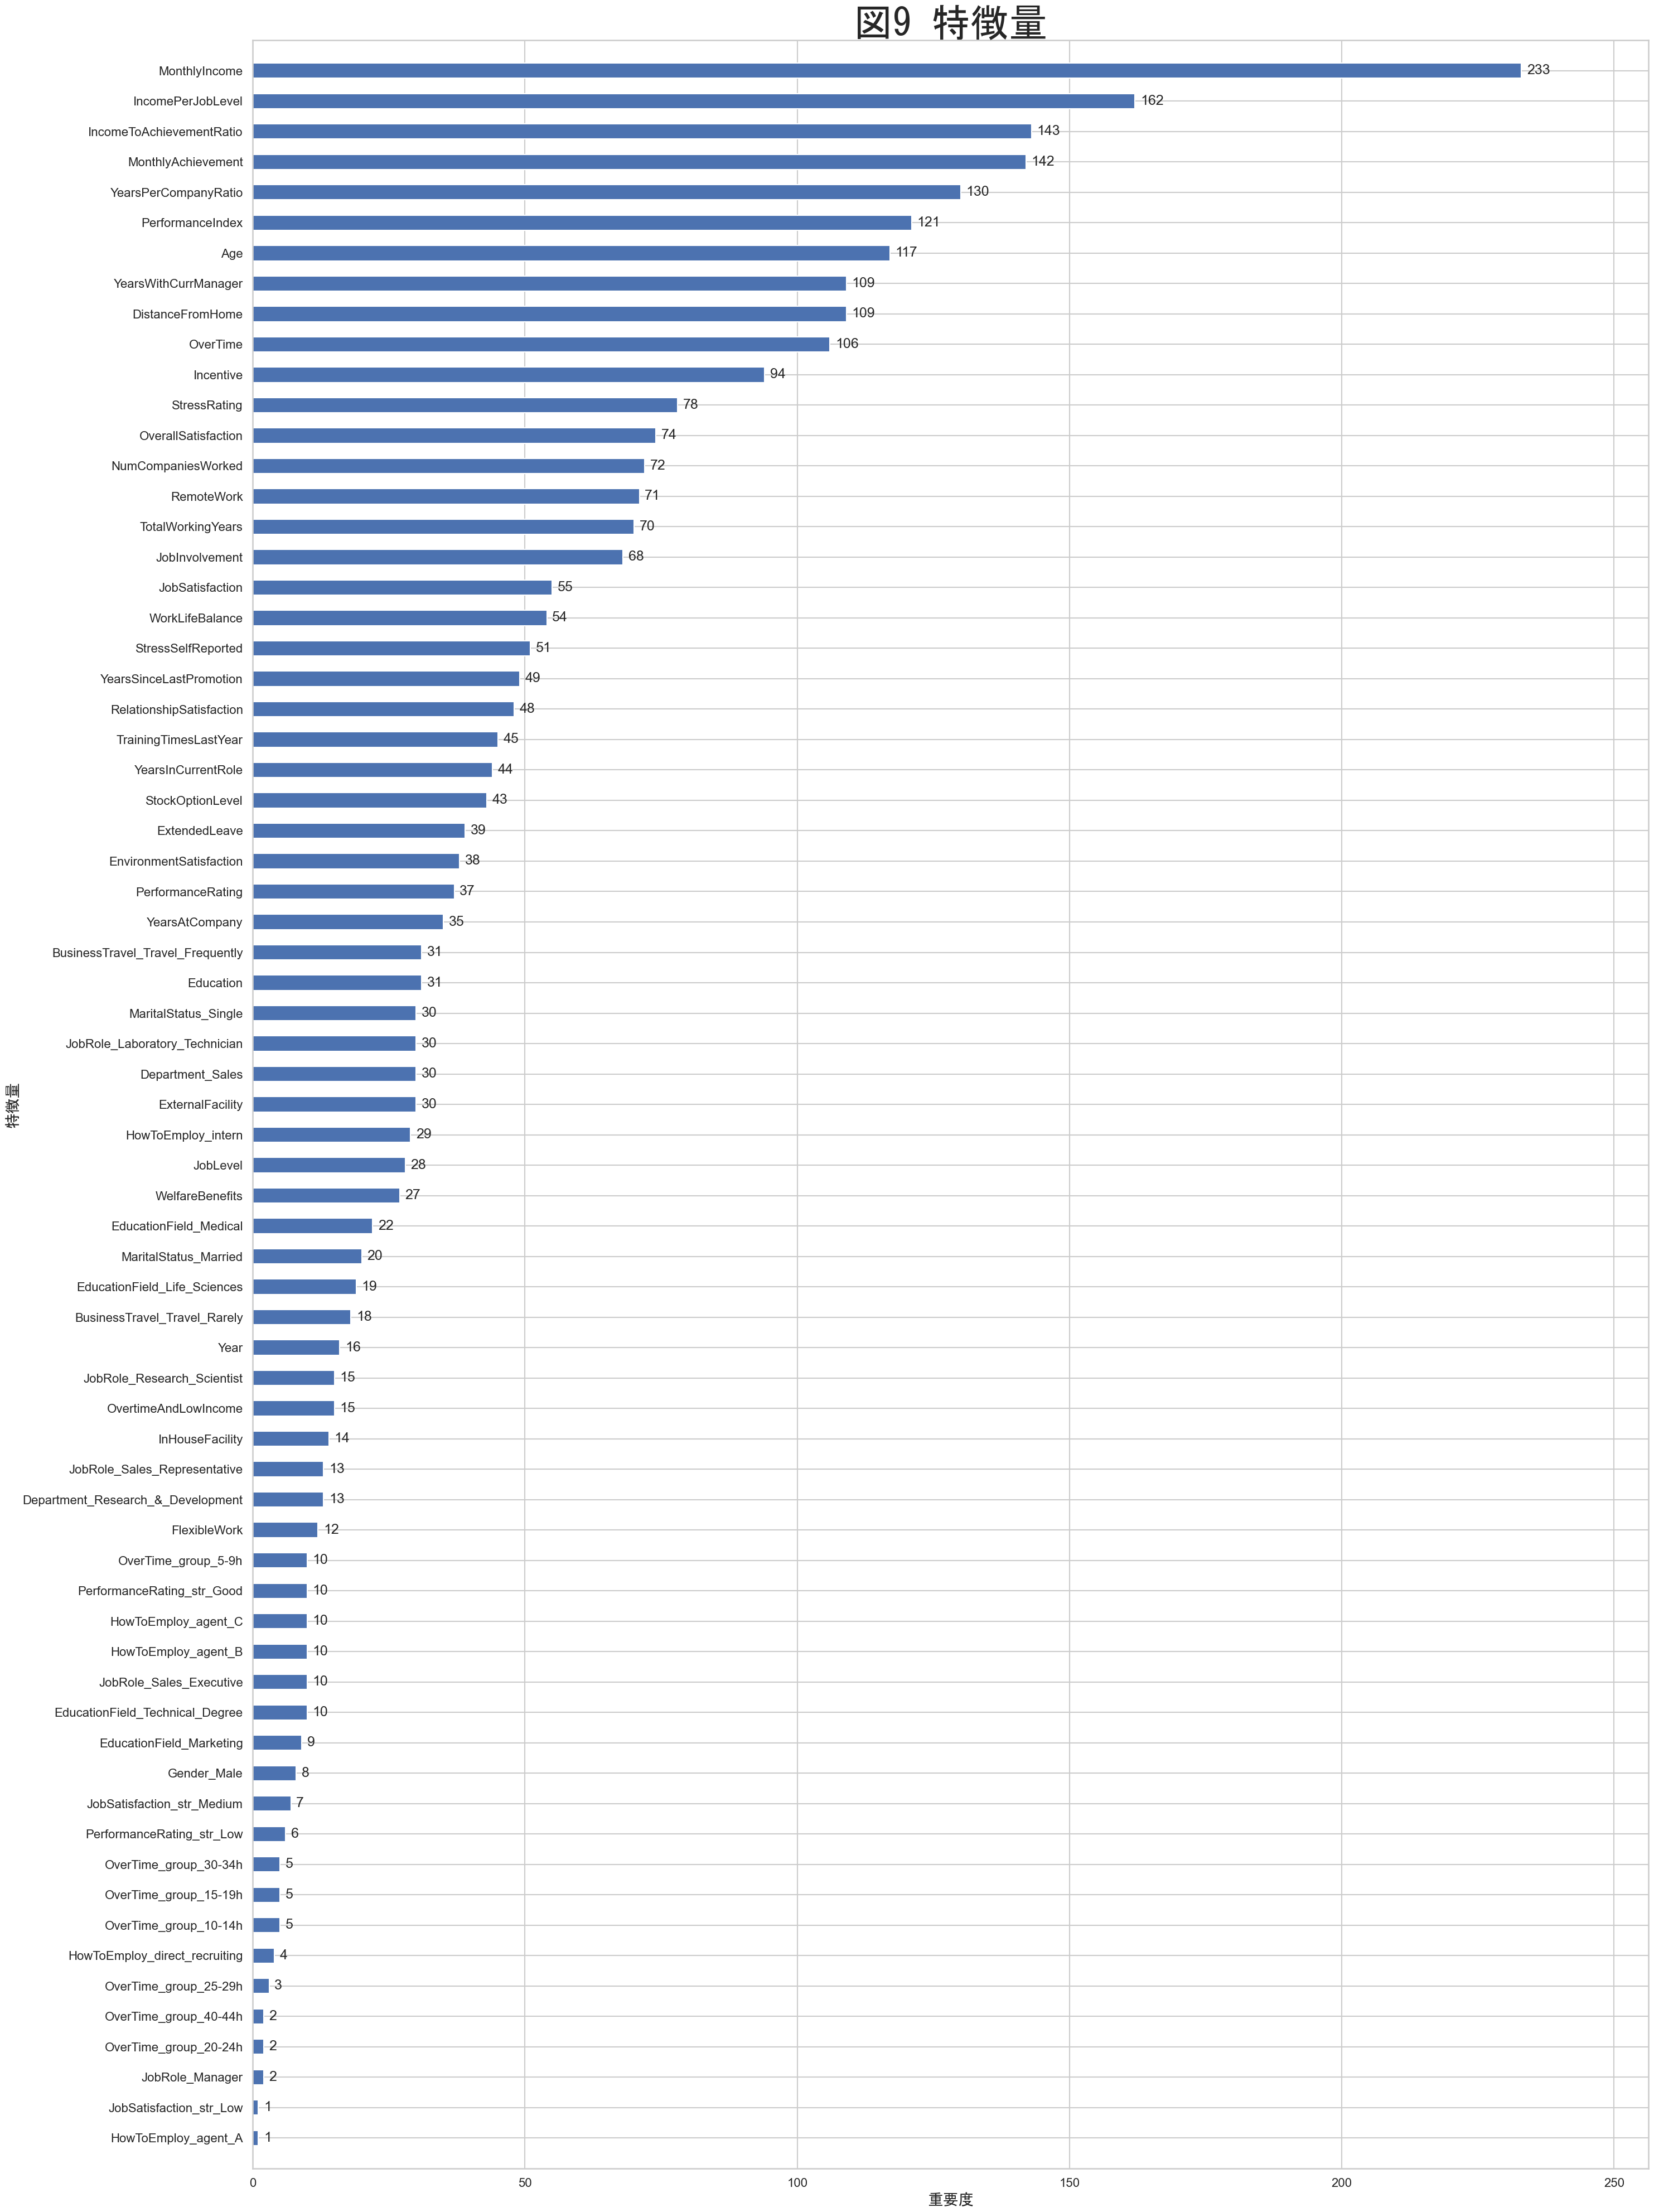

In [25]:
lgb.plot_importance(model, height=0.5, figsize=(30,40))
feature_count = len(X_processed.columns)
print(f"特徴量の数: {feature_count}")
plt.title('図9 特徴量', fontfamily='MS Gothic', fontsize=50)
plt.xlabel('重要度', fontfamily='MS Gothic', fontsize=20)
plt.ylabel('特徴量', fontfamily='MS Gothic', fontsize=20)
plt.tight_layout()
plt.show()

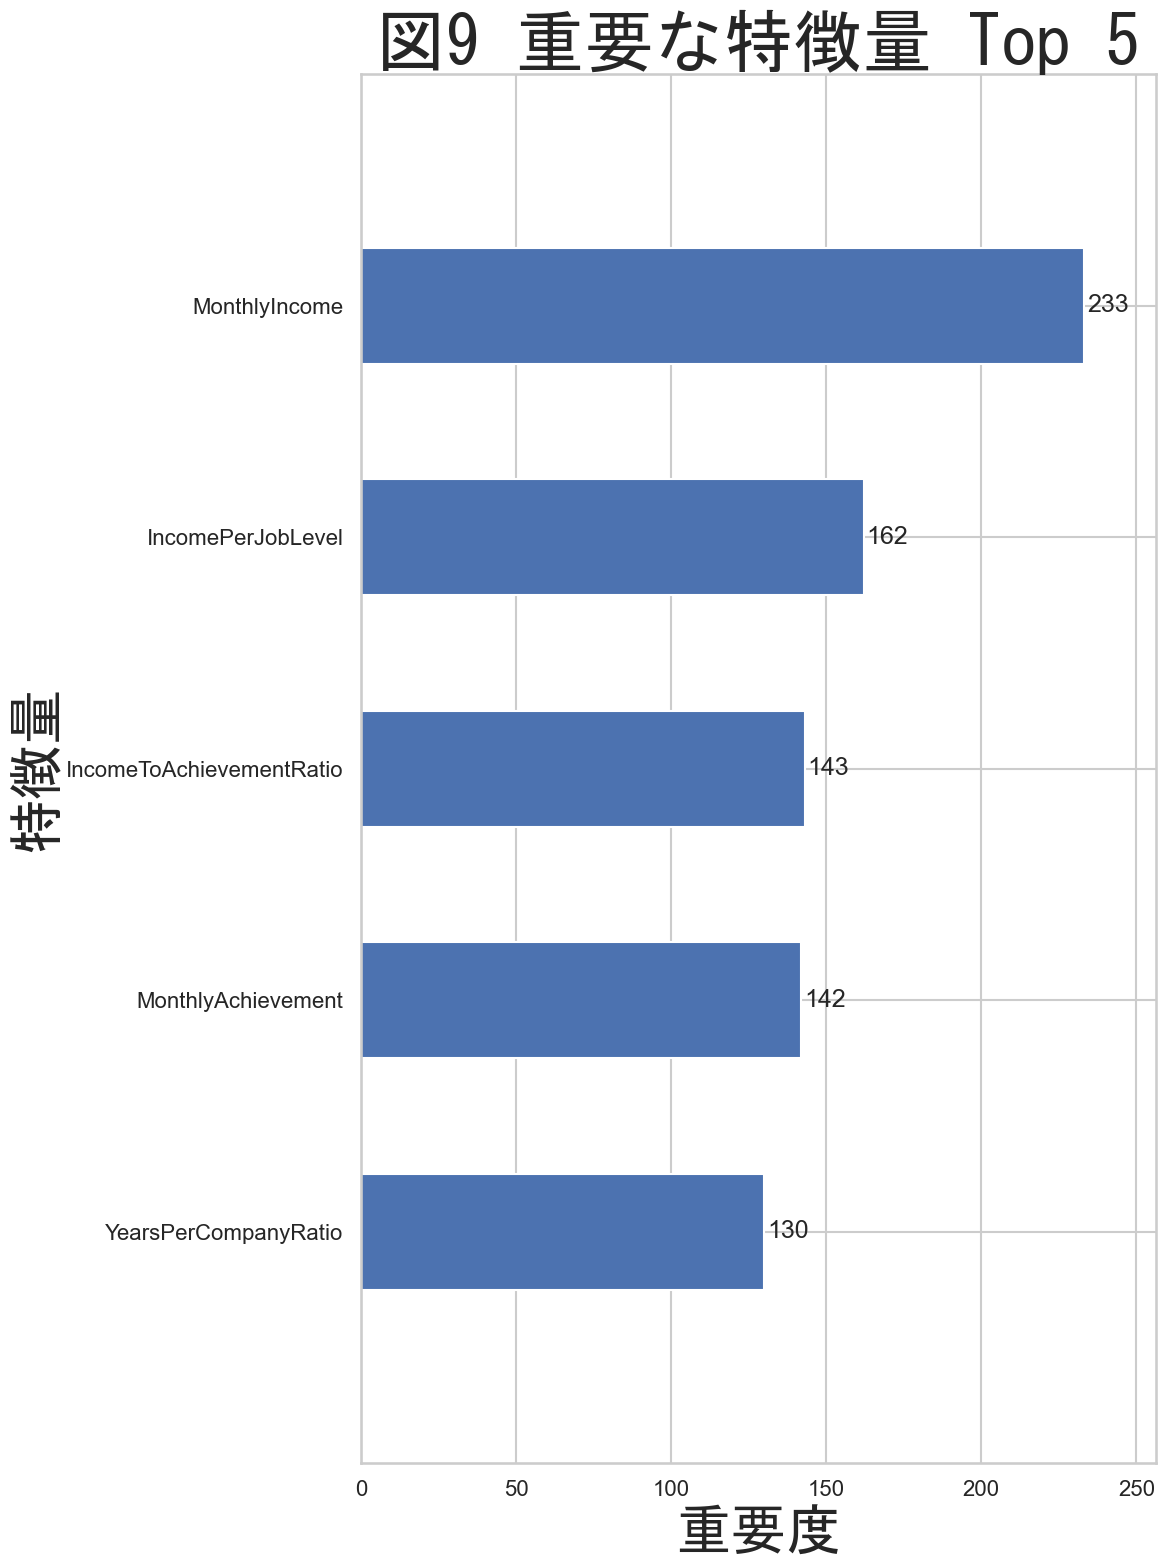

In [26]:
lgb.plot_importance(model, height=0.5, figsize=(12,16), max_num_features=5)

plt.rcParams['ytick.labelsize'] = 10
ax.get_yticklabels()

plt.title('図9 重要な特徴量 Top 5', fontfamily='MS Gothic', fontsize=50)
plt.xlabel('重要度', fontfamily='MS Gothic', fontsize=40)
plt.ylabel('特徴量', fontfamily='MS Gothic', fontsize=40)
plt.tight_layout()
plt.show()
